In [487]:
import requests
import json
import pandas as pd
import mplfinance as mpf
import matplotlib.pyplot as plt

In [488]:
def get_kline_data():
    try:
        pair = "BTCINR"
        interval = "1d"

        # Prepare the request body (JSON)
        params = {
            'pair': pair,
            'interval': interval,
            'limit': 1000
        }

        # Headers for the POST request (no API key or signature required)
        headers = {
            'Content-Type': 'application/json'
        }

        # Construct the full URL for the Kline endpoint
        kline_url = "https://api.pi42.com/v1/market/klines"

        # Send the POST request to get Kline data
        response = requests.post(kline_url, json=params, headers=headers)
        response.raise_for_status()  # Raises an error for 4xx/5xx responses

        # Parse the JSON response data and save it to a variable
        response_data = response.json()

        # Save the data into a variable
        kline_data = response_data

        # Print the JSON response nicely formatted
        #print(json.dumps(kline_data, indent=4))

        # You can now use kline_data elsewhere in your program
        return kline_data

    except ValueError:
        print("Please enter valid inputs for pair, interval.")
    except requests.exceptions.HTTPError as err:
        print(f"Error: {err.response.text if err.response else err}")
    except Exception as e:
        print(f"An unexpected error occurred: {str(e)}")

In [489]:
data = get_kline_data()
df = pd.DataFrame(data)

In [490]:
df['startTime'] = pd.to_datetime(df['startTime'], unit='ms')
df['open'] = pd.to_numeric(df['open'])
df['high'] = pd.to_numeric(df['high'])
df['low'] = pd.to_numeric(df['low'])
df['close'] = pd.to_numeric(df['close'])
df['volume'] = pd.to_numeric(df['volume'])
df['endTime'] = pd.to_datetime(df['endTime'], unit='ms')

C:\Users\goura\AppData\Local\Temp\ipykernel_8396\1418480079.py:1: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  df['startTime'] = pd.to_datetime(df['startTime'], unit='ms')
C:\Users\goura\AppData\Local\Temp\ipykernel_8396\1418480079.py:7: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  df['endTime'] = pd.to_datetime(df['endTime'], unit='ms')


In [491]:
df.dtypes ## data types are npw correct

startTime    datetime64[ns]
open                float64
high                float64
low                 float64
close               float64
endTime      datetime64[ns]
volume              float64
dtype: object

In [492]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341 entries, 0 to 340
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   startTime  341 non-null    datetime64[ns]
 1   open       341 non-null    float64       
 2   high       341 non-null    float64       
 3   low        341 non-null    float64       
 4   close      341 non-null    float64       
 5   endTime    341 non-null    datetime64[ns]
 6   volume     341 non-null    float64       
dtypes: datetime64[ns](2), float64(5)
memory usage: 18.8 KB


In [493]:
df.isna().sum()

startTime    0
open         0
high         0
low          0
close        0
endTime      0
volume       0
dtype: int64

In [494]:
df.duplicated().sum()

1

In [495]:
df.describe()

,startTime,open,high,low,close,endTime,volume
count,341,3.410000e+02,3.410000e+02,3.410000e+02,3.410000e+02,341,3.410000e+02
mean,2024-04-18 21:40:38.709677312,4.992554e+06,5.096702e+06,4.886491e+06,4.999270e+06,2024-04-19 21:40:38.708677376,2.011363e+05
min,2023-11-01 00:00:00,3.049323e+06,3.075151e+06,2.998688e+06,3.053635e+06,2023-11-01 23:59:59.999000,2.050456e+03
25%,2024-01-25 00:00:00,3.873343e+06,3.930821e+06,3.809949e+06,3.877657e+06,2024-01-25 23:59:59.999000064,1.843967e+04
50%,2024-04-19 00:00:00,5.359042e+06,5.471840e+06,5.244168e+06,5.372713e+06,2024-04-19 23:59:59.999000064,1.879708e+05
75%,2024-07-13 00:00:00,5.821197e+06,5.948784e+06,5.685565e+06,5.821877e+06,2024-07-13 23:59:59.999000064,3.119844e+05
max,2024-10-06 00:00:00,6.336725e+06,6.472100e+06,6.178286e+06,6.336009e+06,2024-10-06 23:59:59.999000,1.053024e+06
std,NaN,9.887136e+05,1.009563e+06,9.603796e+05,9.838641e+05,NaN,1.849229e+05


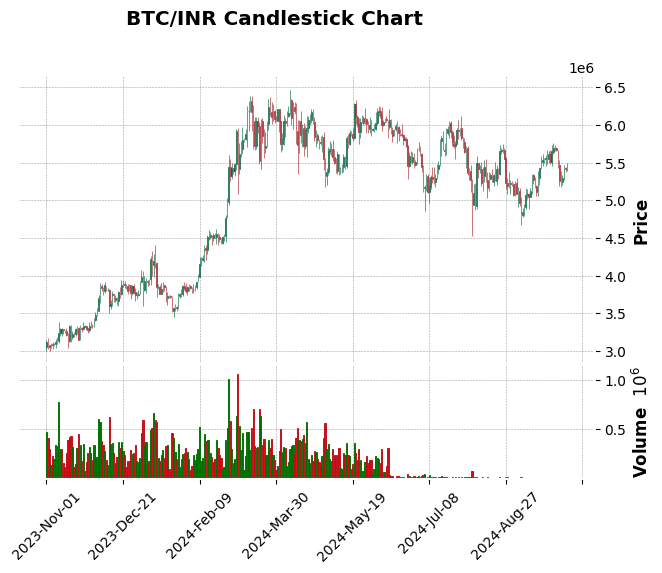

In [496]:
df.set_index('startTime', inplace=True)
mpf.plot(df, type='candle', style='charles', title='BTC/INR Candlestick Chart', volume=True)

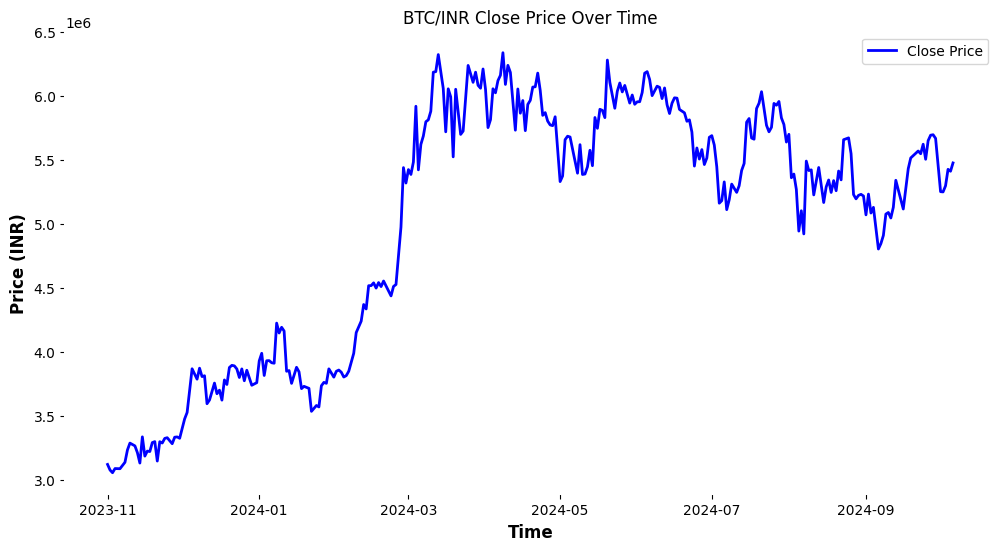

In [497]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['close'], label='Close Price', color='blue')
plt.title('BTC/INR Close Price Over Time')
plt.xlabel('Time')
plt.ylabel('Price (INR)')
plt.legend()
plt.grid()
plt.show()

The closing price often reflects the overall sentiment in the market. For example, a consistent rise in closing prices may indicate bullish sentiment among traders, suggesting confidence in Bitcoin's value. Conversely, falling closing prices could signify bearish sentiment or increasing market caution.

Historical closing prices can help identify key resistance and support levels. For instance, if Bitcoin frequently closes near a particular price point but struggles to break above it, that level may act as a resistance. Conversely, repeated bounces off a lower price point suggest a support level. Traders often use these levels to inform their trading strategies​

Technical Analysis Indicators: Investors often apply technical analysis to Bitcoin’s closing prices to forecast future price movements. Indicators such as Moving Averages, Relative Strength Index (RSI), and Bollinger Bands are commonly used to interpret the data. These tools can reveal trends and potential reversal points, aiding traders in making informed decisions​

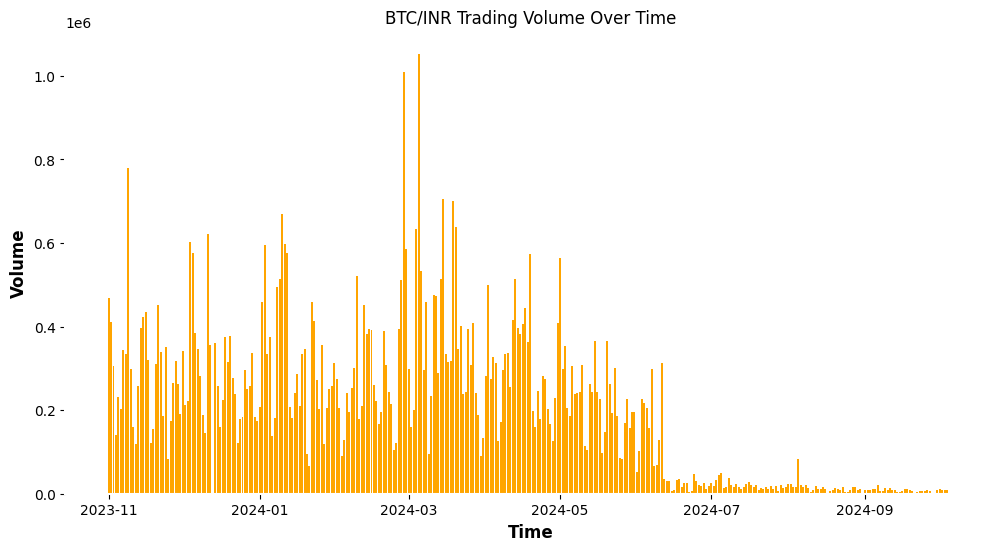

In [498]:
plt.figure(figsize=(12, 6))
plt.bar(df.index, df['volume'], color='orange')
plt.title('BTC/INR Trading Volume Over Time')
plt.xlabel('Time')
plt.ylabel('Volume')
plt.grid()
plt.show()

High trading volume often indicates strong interest and activity in the market. It can suggest that a price movement (either up or down) is significant and more likely to be sustained.

If a price increase is accompanied by high volume, it can be seen as a confirmation of strength in that move. near 2024-03


Conversely, if a price increase happens with low volume, it might indicate a lack of conviction, and the move could be temporary. near 2024-09

If a candlestick shows a high volume while the price is increasing, it suggests that many traders are buying in, indicating bullish sentiment.

If the volume is low during a price increase, it might imply that the price rise is not strongly supported by market activity, and a reversal could be possible.

Step 3: Calculating Key Technical Indicators

In this step, we will calculate some key technical indicators to help analyze the price movements of BTCINR. We'll focus on:

Moving Averages (MA): Commonly used to smooth price data and identify trends.

Relative Strength Index (RSI): A momentum oscillator that measures the speed and change of price movements to identify overbought or oversold conditions.


3.1 Moving Averages

We'll calculate two types of moving averages:

Simple Moving Average (SMA): The average of the closing prices over a specified number of periods.

Exponential Moving Average (EMA): A weighted moving average that gives more weight to recent prices.

3.2 Relative Strength Index (RSI)
The RSI is calculated using the following formula:

RSI = 100 - (100/(1+RS))

Where RS (Relative Strength) is the average of 'x' days' up closes divided by the average of 'x' days' down closes.

In [499]:
# Set the period for the moving averages
sma_period = 14  # For SMA
ema_period = 14  # For EMA

In [500]:
# Calculate Simple Moving Average (SMA)
df['SMA'] = df['close'].rolling(window=sma_period).mean()

# Calculate Exponential Moving Average (EMA)
df['EMA'] = df['close'].ewm(span=ema_period, adjust=False).mean()

In [501]:
# 3.2 Calculate Relative Strength Index (RSI)
def calculate_rsi(data, period=14):
    delta = data['close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()
    
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

df['RSI'] = calculate_rsi(df)


In [502]:
# Display the updated DataFrame with new indicators
print(df[['close', 'SMA', 'EMA', 'RSI']].tail(20))  # Display the last 20 entries

                close           SMA           EMA        RSI
startTime                                                   
2024-09-17  5299491.0  5.086052e+06  5.163801e+06  57.713069
2024-09-18  5429530.0  5.107626e+06  5.199231e+06  60.150484
2024-09-19  5513536.0  5.146610e+06  5.241139e+06  69.326717
2024-09-20  5534560.0  5.198935e+06  5.280261e+06  78.902137
2024-09-21  5548409.0  5.249232e+06  5.316014e+06  78.418926
2024-09-22  5568040.0  5.296366e+06  5.349618e+06  77.618646
2024-09-23  5546447.0  5.330055e+06  5.375862e+06  72.468613
2024-09-24  5620834.0  5.368158e+06  5.408525e+06  73.999548
2024-09-25  5503358.0  5.400932e+06  5.421169e+06  69.343605
2024-09-26  5648740.0  5.438111e+06  5.451512e+06  70.859275
2024-09-27  5691433.0  5.463282e+06  5.483501e+06  66.320968
2024-09-28  5695065.0  5.493497e+06  5.511710e+06  70.813238
2024-09-29  5666527.0  5.527179e+06  5.532352e+06  74.365554
2024-09-30  5467349.0  5.552380e+06  5.523685e+06  66.238090
2024-10-01  5250140.0  5

.ewm(...):

The ewm() function stands for Exponential Weighted Functions. This function is used to calculate exponentially weighted statistics.
It provides the ability to apply weights to the data points, giving more importance to recent data points and less to older ones. This is particularly useful for time series data, where more recent data is generally more relevant.

span=ema_period:

The span parameter determines the period over which the EMA is calculated. In your case, it is set to ema_period, which is typically defined earlier in the code (like 14). This means that the EMA will consider the last 14 periods of closing prices.
The choice of the span affects how quickly the EMA reacts to price changes. A smaller span will result in a more sensitive (volatile) EMA, while a larger span will smooth out the price changes more.

adjust=False:

The adjust parameter controls how the weights are applied to the data points. When set to False, the weights are calculated using a decreasing factor, which means that the EMA will react more to recent prices than to older prices.
If set to True, it adjusts the weights according to the total number of observations up to the current point in time, which can make the EMA less sensitive to recent price changes.

The Relative Strength Index (RSI) is a momentum oscillator that measures the speed and change of price movements. It ranges from 0 to 100 and is typically used to identify overbought or oversold conditions in a market. An RSI above 70 is often considered overbought, while an RSI below 30 is considered oversold.

Formula for RSI
The RSI is calculated using the following formula:

RSI = 100 - (100/(1+RS))
Where:

𝑅
𝑆
RS (Relative Strength) is the average of 
𝑛
n days' up closes divided by the average of 
𝑛
n days' down closes.

.diff(): This method computes the difference between each closing price and the previous closing price, producing a new Series (delta) that shows how much the price has changed from one period to the next.

delta.where(delta > 0, 0): This replaces any negative values in delta with 0, effectively filtering out the losses and leaving only the gains.

-delta.where(delta < 0, 0): This negates the losses by replacing positive values in delta with 0, effectively keeping only the negative changes as positive values. The negative signs are used because we want to report losses as positive values for averaging.

1. Data Preparation
You'll want to prepare your historical Kline data for modeling. This may include:

Creating additional features like Moving Averages or the RSI (which you already computed).
Splitting the data into training and testing sets.

Example using Linear Regression:

In [503]:
df.head(20)

,open,high,low,close,endTime,volume,SMA,EMA,RSI
startTime,,,,,,,,,
2023-11-01,3049323.2,3144592.0,2998688.0,3118491.2,2023-11-01 23:59:59.999,469214.787,NaN,3.118491e+06,NaN
2023-11-02,3118500.0,3167991.2,3018400.0,3074728.8,2023-11-02 23:59:59.999,410221.727,NaN,3.112656e+06,NaN
2023-11-03,3074728.8,3075151.2,3002824.0,3053635.2,2023-11-03 23:59:59.999,306048.199,NaN,3.104787e+06,NaN
2023-11-04,3053644.0,3103760.0,3042300.8,3086133.6,2023-11-04 23:59:59.999,140746.874,NaN,3.102300e+06,NaN
2023-11-05,3086133.6,3120057.6,3023328.0,3082244.0,2023-11-05 23:59:59.999,231363.339,NaN,3.099626e+06,NaN
2023-11-06,3082244.0,3106391.2,3057401.6,3085051.2,2023-11-06 23:59:59.999,202227.215,NaN,3.097682e+06,NaN
2023-11-07,3085060.0,3161109.6,3037786.4,3115772.0,2023-11-07 23:59:59.999,343525.950,NaN,3.100094e+06,NaN
2023-11-08,3115772.0,3181200.0,3086424.0,3135149.6,2023-11-08 23:59:59.999,334779.449,NaN,3.104768e+06,NaN
2023-11-09,3135149.6,3387991.2,3106752.0,3231316.0,2023-11-09 23:59:59.999,778877.937,NaN,3.121641e+06,NaN


In [504]:
df.tail(20)

,open,high,low,close,endTime,volume,SMA,EMA,RSI
startTime,,,,,,,,,
2024-09-17,5114022.0,5391602.0,5061740.0,5299491.0,2024-09-17 23:59:59.999,11315.573,5.086052e+06,5.163801e+06,57.713069
2024-09-18,5298911.0,5432767.0,5201291.0,5429530.0,2024-09-18 23:59:59.999,11974.207,5.107626e+06,5.199231e+06,60.150484
2024-09-19,5432230.0,5592901.0,5412690.0,5513536.0,2024-09-19 23:59:59.999,9627.778,5.146610e+06,5.241139e+06,69.326717
2024-09-20,5513369.0,5617622.0,5459049.0,5534560.0,2024-09-20 23:59:59.999,7167.305,5.198935e+06,5.280261e+06,78.902137
2024-09-21,5533763.0,5566104.0,5495262.0,5548409.0,2024-09-21 23:59:59.999,2131.344,5.249232e+06,5.316014e+06,78.418926
2024-09-22,5549119.0,5605533.0,5461230.0,5568040.0,2024-09-22 23:59:59.999,4534.990,5.296366e+06,5.349618e+06,77.618646
2024-09-23,5569538.0,5670182.0,5479363.0,5546447.0,2024-09-23 23:59:59.999,7588.653,5.330055e+06,5.375862e+06,72.468613
2024-09-24,5545072.0,5658634.0,5490663.0,5620834.0,2024-09-24 23:59:59.999,7531.421,5.368158e+06,5.408525e+06,73.999548
2024-09-25,5621709.0,5670543.0,5485203.0,5503358.0,2024-09-25 23:59:59.999,5679.879,5.400932e+06,5.421169e+06,69.343605


In [505]:
df = df.drop(columns=["SMA", "EMA", "RSI"], axis = 1)

In [506]:
df.columns

Index(['open', 'high', 'low', 'close', 'endTime', 'volume'], dtype='object')

In [507]:
import numpy as np
from sklearn.model_selection import train_test_split

# Assuming 'data' is your DataFrame with closing prices and other features
df['RSI'] = calculate_rsi(df)
df['MA_5'] = df['close'].rolling(window=5).mean()
df['MA_20'] = df['close'].rolling(window=20).mean()

In [508]:
df = df.dropna()

In [509]:
# Define the features and target variable
features = df[['RSI', 'MA_5', 'MA_20']]
target = df['close'].shift(-1)  # Predict the next closing price
target = target.dropna()

# Drop the last row of the DataFrame to align features with the target
features = df[['RSI', 'MA_5', 'MA_20']].iloc[:-1]

In [510]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [511]:
from sklearn.linear_model import LinearRegression

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [512]:
predictions = model.predict(X_test)


In [513]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R²: {r2}")


MAE: 133749.03501666588
MSE: 29683486524.163227
R²: 0.9652846318003765


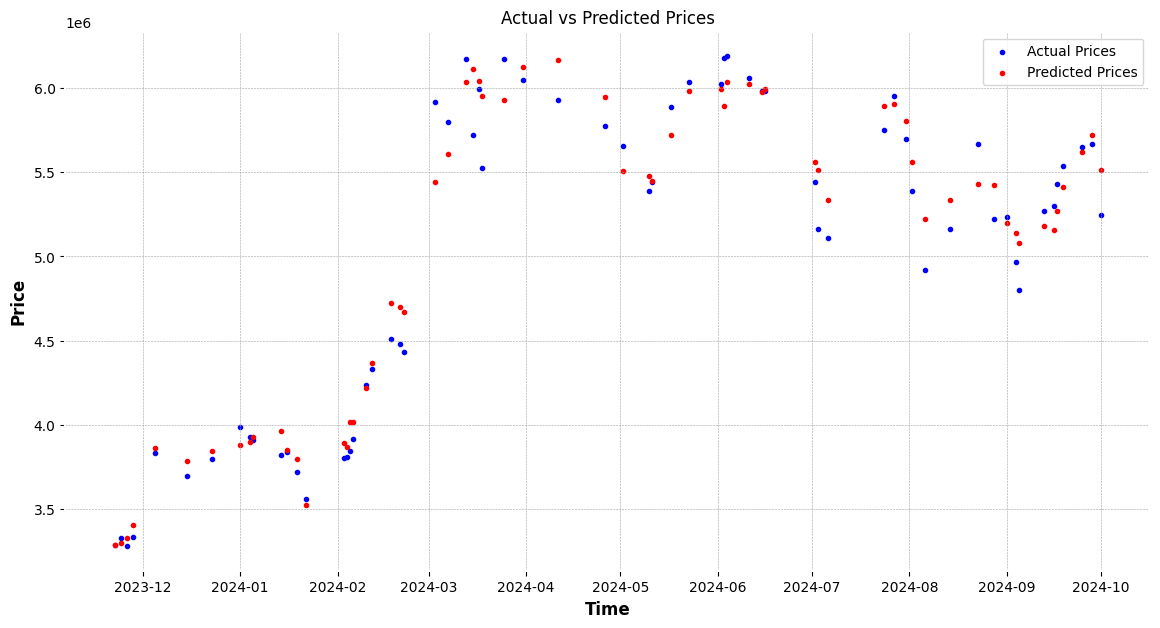

In [514]:
import matplotlib.pyplot as plt

# Plot actual vs predicted prices
plt.figure(figsize=(14, 7))
plt.scatter(y_test.index, y_test, label='Actual Prices', color="blue", marker= ".")
plt.scatter(y_test.index, predictions, label='Predicted Prices', color='red', marker= ".")
plt.title('Actual vs Predicted Prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


In [515]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


In [516]:
# Create a Decision Tree Regressor
model = DecisionTreeRegressor(random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)


DecisionTreeRegressor(random_state=42)

In [517]:
# Make predictions
predictions = model.predict(X_test)


In [518]:
# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse:.2f}')


Mean Squared Error: 51864594281.93


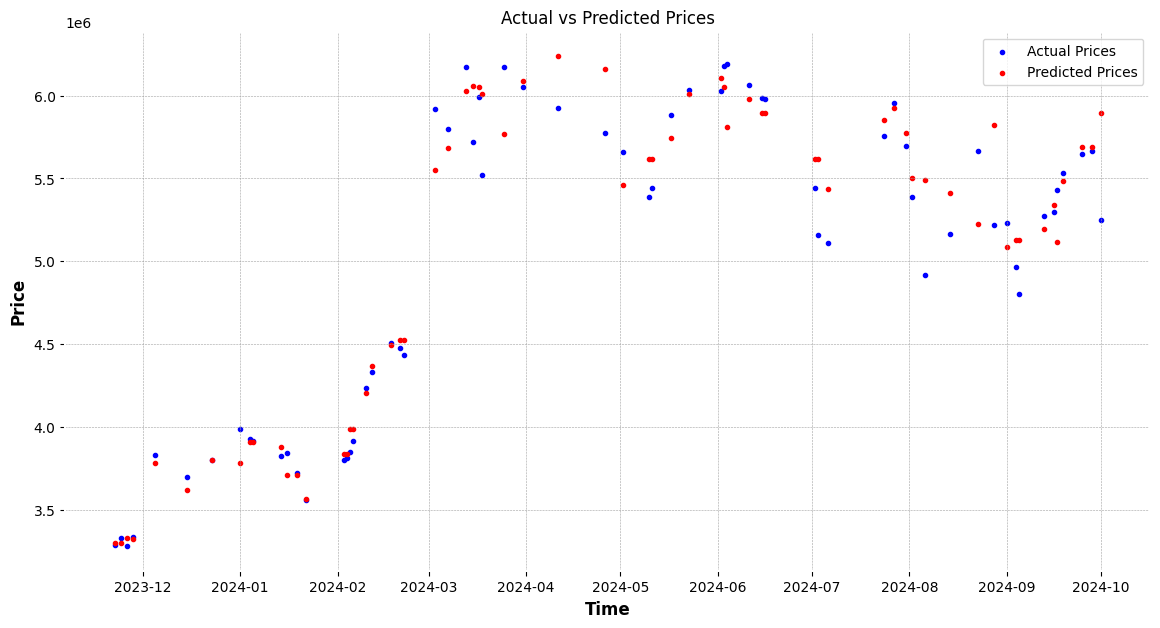

In [519]:
# Plot actual vs predicted prices
plt.figure(figsize=(14, 7))
plt.scatter(y_test.index, y_test, label='Actual Prices', color="blue", marker= ".")
plt.scatter(y_test.index, predictions, label='Predicted Prices', color='red', marker= ".")
plt.title('Actual vs Predicted Prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [520]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [521]:
import numpy as np
import pandas as pd

def backtest_model(predictions, actual_prices, initial_capital=10000):
    """
    Backtest a trading strategy based on model predictions.

    Args:
        predictions (pd.Series): Predicted prices from the model.
        actual_prices (pd.Series): Actual prices of the asset.
        initial_capital (float): Starting capital for trading.

    Returns:
        pd.DataFrame: A DataFrame containing the results of the backtest.
    """
    # Initialize variables
    capital = initial_capital
    positions = 0
    trade_log = []

    for i in range(1, len(predictions)):
        # Check if we should buy (if predicted price is higher than actual price)
        if predictions[i] > actual_prices[i-1] and positions == 0:
            # Buy one unit
            positions += 1
            capital -= actual_prices[i]
            trade_log.append({
                'Date': actual_prices.index[i],
                'Action': 'Buy',
                'Price': actual_prices[i],
                'Capital': capital,
                'Positions': positions
            })

        # Check if we should sell (if predicted price is lower than actual price)
        elif predictions[i] < actual_prices[i-1] and positions > 0:
            # Sell one unit
            positions -= 1
            capital += actual_prices[i]
            trade_log.append({
                'Date': actual_prices.index[i],
                'Action': 'Sell',
                'Price': actual_prices[i],
                'Capital': capital,
                'Positions': positions
            })

    # Final value of the portfolio
    final_value = capital + positions * actual_prices.iloc[-1]
    trade_log.append({
        'Date': actual_prices.index[-1],
        'Action': 'End',
        'Price': actual_prices.iloc[-1],
        'Capital': final_value,
        'Positions': positions
    })

    return pd.DataFrame(trade_log)


In [522]:
# Example predictions from Linear Regression and Decision Tree
# Ensure they are in the same index format as actual_prices
predictions_lr = pd.Series(predictions, index=y_test.index)


# Assuming actual_prices is the actual closing prices of BTCINR
actual_prices = y_test

# Backtest Linear Regression Model
backtest_results_lr = backtest_model(predictions_lr, actual_prices)
print("Backtest Results for Linear Regression:")
print(backtest_results_lr)



Backtest Results for Linear Regression:
         Date Action        Price       Capital  Positions
0  2024-03-31    Buy  6049613.000 -6.039613e+06          1
1  2024-06-04   Sell  6188241.000  1.486280e+05          0
2  2024-03-03    Buy  5917556.000 -5.768928e+06          1
3  2024-07-03   Sell  5160003.000 -6.089250e+05          0
4  2024-09-25    Buy  5648740.000 -6.257665e+06          1
5  2024-02-18   Sell  4508292.600 -1.749372e+06          0
6  2024-08-23    Buy  5665252.000 -7.414624e+06          1
7  2024-02-12   Sell  4333543.500 -3.081081e+06          0
8  2024-05-23    Buy  6035040.000 -9.116121e+06          1
9  2024-08-14   Sell  5165270.000 -3.950851e+06          0
10 2024-03-25    Buy  6171247.000 -1.012210e+07          1
11 2024-02-06   Sell  3914881.100 -6.207217e+06          0
12 2024-06-11    Buy  6060707.000 -1.226792e+07          1
13 2024-01-14   Sell  3822098.500 -8.445825e+06          0
14 2024-01-05    Buy  3913025.434 -1.235885e+07          1
15 2024-09-13   

C:\Users\goura\AppData\Local\Temp\ipykernel_8396\4113748410.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if predictions[i] > actual_prices[i-1] and positions == 0:
C:\Users\goura\AppData\Local\Temp\ipykernel_8396\4113748410.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  capital -= actual_prices[i]
C:\Users\goura\AppData\Local\Temp\ipykernel_8396\4113748410.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'Price': a

In [523]:
def calculate_performance_metrics(trade_log):
    """
    Calculate performance metrics from the trade log.

    Args:
        trade_log (pd.DataFrame): DataFrame containing trade log.

    Returns:
        dict: A dictionary containing performance metrics.
    """
    total_trades = len(trade_log) - 1  # Exclude final entry
    total_wins = sum(trade_log['Action'] == 'Sell')
    total_loss = total_trades - total_wins
    final_capital = trade_log['Capital'].iloc[-1]

    return {
        'Total Trades': total_trades,
        'Winning Trades': total_wins,
        'Losing Trades': total_loss,
        'Final Capital': final_capital,
        'Return (%)': ((final_capital - 10000) / 10000) * 100  # Assuming initial capital is 10000
    }

# Calculate performance for both models
performance_lr = calculate_performance_metrics(backtest_results_lr)


print("Performance Metrics for Linear Regression:", performance_lr)



Performance Metrics for Linear Regression: {'Total Trades': 41, 'Winning Trades': 20, 'Losing Trades': 21, 'Final Capital': -17459196.306, 'Return (%)': -174691.96306}


In [524]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score



# Set up the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 50],  # Number of trees in the forest
    'max_features': [0.1, 0.2, 0.05],  # Number of features to consider when looking for the best split
    'max_depth': [10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

tscv = TimeSeriesSplit(n_splits=5)

# Initialize RandomForestRegressor
rf = RandomForestRegressor(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=tscv, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters found
print("Best parameters found: ", grid_search.best_params_)

# Predict on the test set with the best estimator
best_rf = grid_search.best_estimator_
predictions = best_rf.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

print(f'RMSE: {rmse}')
print(f'R^2 Score: {r2}')




Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best parameters found:  {'max_depth': 10, 'max_features': 0.1, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
RMSE: 163450.9431091918
R^2 Score: 0.9687549138077229


In [525]:
from xgboost import XGBRegressor

In [531]:
# Set up the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100],  # Number of trees in the ensemble
    'max_depth': [10, 20,30,5],       # Maximum depth of trees
    'learning_rate': [0.01, 0.1, 0.2], # Step size shrinkage
    'subsample': [0.8, 0.9, 1.0],      # Fraction of samples to be used for each tree
    'colsample_bytree': [0.8, 0.9, 1.0] # Fraction of features to be used for each tree
}

# Initialize TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

# Initialize XGBRegressor
xgb = XGBRegressor(objective='reg:squarederror', random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=xgb, 
                           param_grid=param_grid,
                           cv=tscv, 
                           scoring='neg_mean_squared_error', 
                           n_jobs=-1, 
                           verbose=2)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters found
print("Best parameters found: ", grid_search.best_params_)

# Predict on the test set with the best estimator
best_xgb = grid_search.best_estimator_
predictions = best_xgb.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
rmse_test = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

print(f'Test RMSE: {rmse_test}')
print(f'Test R^2 Score: {r2}')

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best parameters found:  {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50, 'subsample': 0.8}
Test RMSE: 168793.04335093434
Test R^2 Score: 0.9666791591190058
